# Практическая работа №3: Регрессионный анализ
Выполнил студент гр. 1374 Григорьев Евгений. Вариант №4

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения
МНК

$RSS(\beta)=\left\| Y-X^{\intercal}\beta \right\|=(Y-X^{\intercal}\beta)^{\intercal}\cdot(Y-X^{\intercal}\beta)\to min_\beta$

Несмещённая оценка дисперсии:

$S^{2} = \frac{SS_{e}}{n-r} = \frac{RSS(\widehat{\beta})}{n-r}$

Элемент дисперсии оценки: $b_{\psi}=C^{\intercal}(XX^{\intercal})^{-1}C$

Доверительный интервал уровня доверия $1-\alpha: \left[ \widehat{\psi} - X_{\alpha}S\sqrt{b};\widehat{\psi} + X_{\alpha}S\sqrt{b} \right], где X_{\alpha}: \mathcal{S}_{n-r}(X_{\alpha})=1-\frac{\alpha}{2}$

Критерий хихи квадрат.  
$ \chi^2 = \sum_{i=1}^{N} \frac{(n_{i} - p_{i} n)^{2}}{n p_{i}} \sim \chi^{2}_{n-1}$

Теорема Колмогорова

$D_{n} = {sup}_{X \in \mathbb R} |F_{0}(X_{i}) - F_{n}(X_{i})|$


## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y
 от переменной X. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


In [87]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [88]:
import pandas as pd

In [89]:
import scipy.stats as sst

### #1 Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной Y по переменной X. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$.  Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

In [90]:
# Считаем исходные данные
x = np.array('''5 3 3 1 2 3 4 5 5 4 4 3 4 6 6 4 8 4 4 4 7 3 5 3 3 4 3 5 5 4 5 1 4 4 5 5 4 6 5 4 4 2 4 6 4 3 5 4 2 4'''.split(), dtype=np.float).reshape(-1, 1)
y = np.array('''9.53 11.80 10.93 2.39 5.18
 2.74 17.45 14.32 8.01 14.71 11.06 6.67 6.59 7.01 22.17
  9.65 7.77 6.49 13.64 1.53 5.68 7.61 5.71 7.00 2.77 12.34 12.39 6.73 8.65 8.34 10.39 3.87 9.08 16.03
  10.37 2.22 11.51 9.10 5.45 11.69 10.92 8.54 13.01 17.58 8.61 7.42 8.47 10.93 4.71 17.92 '''.split(), dtype=np.float).reshape(-1, 1)


<ipython-input-90-596fca9cbc33>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.array('''5 3 3 1 2 3 4 5 5 4 4 3 4 6 6 4 8 4 4 4 7 3 5 3 3 4 3 5 5 4 5 1 4 4 5 5 4 6 5 4 4 2 4 6 4 3 5 4 2 4'''.split(), dtype=np.float).reshape(-1, 1)
<ipython-input-90-596fca9cbc33>:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  10.37 2.22 11.51 9.

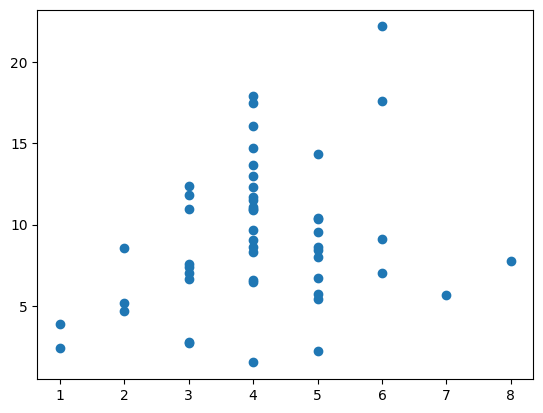

In [91]:
# Нарисуем поточечный график
plt.scatter(x, y)

In [92]:
lr = LinearRegression()

In [93]:
# Обучим модель линейной регрессии для проверки
lr.fit(x, y)
display(lr.coef_)
lr.intercept_

array([[0.86466298]])

array([5.74848177])

In [94]:
x = np.concatenate([x, np.ones(x.shape)], axis=1)

In [95]:
# Решим аналитически, коэфф. совпали.
solve = np.linalg.inv(np.dot(x.T, x)) @ x.T @ y
solve

array([[0.86466298],
       [5.74848177]])

In [96]:
k, b = solve[0][0], solve[1][0]

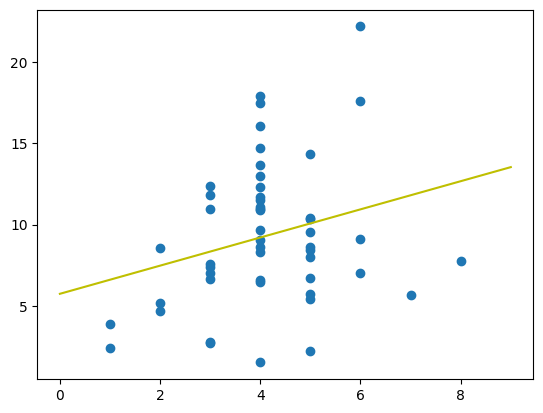

In [97]:
# Нарисуем прямую
plt.scatter(x[:, 0], y)
tmp_x = np.linspace(np.min(x) - 1, np.max(x) + 1, 100)
plt.plot(tmp_x, k * tmp_x + b, 'y')

Исходные данные не лежат на одной прямой.

### #2 Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом $h$. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha$ по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

In [98]:
mist = lr.predict(x[:, [0]]) - y
S2 = np.sum((mist) ** 2) / (x.shape[0] - np.linalg.matrix_rank(x))

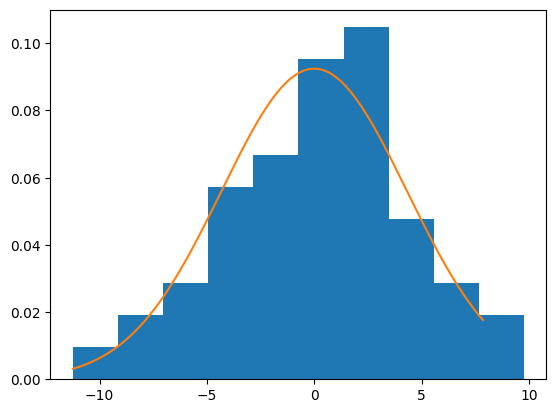

In [99]:
# Строим гистограмму и плотность распределения
h = 2.1
bins = np.arange(min(mist), max(mist) + h, h)
plt.hist(mist, bins=bins, density=True)
hist, _ = np.histogram(mist, bins=bins)

tmp_x = np.linspace(min(mist), max(mist), 1000)
plt.plot(tmp_x, sst.norm(0, S2 ** 0.5).pdf(tmp_x))


In [100]:
f'несмещенная оценка дисперсии {S2}'

'несмещенная оценка дисперсии 18.62355717127072'

In [101]:
# Возьмем разбиение из гистограммы

intervals = [[bins[i] + 1e-5 * (i != 0), bins[i + 1]] for i in range(len(bins) - 1)]

In [102]:
g = lambda x: np.sum((mist >= x[0]) & (mist <= x[1]))

In [103]:
# Экспериментальные частоты
frq_exp = np.array([g(i) for i in intervals]) / len(mist)
assert frq_exp.sum() == 1

In [104]:
N = sst.norm(0, S2)

In [105]:
# Ожидаемые частоты
frq_norm = np.array([abs(N.pdf(i[1]) - N.pdf(i[0])) * len(mist) for i in intervals])

In [106]:
frq_norm

array([0.05678866, 0.04763801, 0.03679471, 0.02460447, 0.01149506,
       0.00204872, 0.01551485, 0.0283962 , 0.04022221, 0.05058741])

In [107]:
chi_square = np.sum((frq_exp - frq_norm) ** 2 / frq_norm)
f"chi^2: {chi_square}"

'chi^2: 23.860207655534047'

In [108]:
alph = 0.1
f'x_alph: {sst.chi2.ppf(1 - alph, df=len(frq_norm) - 1)}'

'x_alph: 14.683656573259837'

$\chi^2 > x_{\alpha}$ следовательно гипотеза о нормальности ошибок отвергается

In [109]:
# Строим эпмирическую функцию
mist_tmp = mist.reshape(-1)
emp_func = pd.Series(mist_tmp).apply(lambda x: sum(mist_tmp < x)) / mist_tmp.shape[0]

In [110]:
emp_func.index = mist_tmp

In [111]:
Dn = np.max(np.abs(N.pdf(mist_tmp) - emp_func))
Dn

0.9604003091091647

In [112]:
C = sst.kstwobign.ppf(1 - alph) / np.sqrt(len(x))
C

0.17307822563424255

$D_n > С \implies$ гипотезy отвергаем

### #3 В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0$ и $\beta_1$ уровня доверия $1 - \alpha$. Построить доверительный эллипс уровня доверия $1 - \alpha$ для $(\beta_0, \beta_1)$ (вычислить его полуоси).

In [113]:
# Считаем доверительные интервалы по алгоритму
r = np.linalg.matrix_rank(x)
n = x.shape[0]
x_alpha = sst.t.ppf(1 - alph/2, df = n - r)
C = np.matrix([[1], [0]])
psi = (C.T @ np.linalg.inv(x.T @ x) @ C)
psi = psi[0, 0]
print(f"x_alpha = {x_alpha}" )
print(f"left = {solve[0][0] - x_alpha * (S2 * psi) ** 0.5}")
print(f"right = {solve[0][0] + x_alpha * (S2 * psi) ** 0.5}")

x_alpha = 1.6772241953450393
left = 0.10381455573305787
right = 1.6255114111177702


$\left[0.103, 1.625\right] \ni \beta_0$

In [114]:
# Считаем доверительные интервалы по алгоритму
r = np.linalg.matrix_rank(x)
n = x.shape[0]
x_alpha = sst.t.ppf(1 - alph / 2, df=n - r)
C = np.matrix([[0], [1]])
psi = (C.T @ np.linalg.inv(x.T @ x) @ C)
psi = psi[0, 0]
print(f"x_alpha = {x_alpha}" )
print(f"left = {solve[1][0] - x_alpha * (S2 * psi) ** 0.5}")
print(f"right = {solve[1][0] + x_alpha * (S2 * psi) ** 0.5}")

x_alpha = 1.6772241953450393
left = 2.465352476693216
right = 9.031611059218381


$\left[2.465, 9.031\right] \ni \beta_1$

In [115]:
# Посчитаем полуоси эллипсов через собственные числа (переход в базис из собственных векторов для достижения канон. вида квадратичной формы)
C = np.array([[1, 0],
              [0, 1]
              ])
B = C.T @ np.linalg.inv(x.T @ x) @ C
B_inv = np.linalg.inv(B)
q = len(solve)
x_alpha = sst.f.ppf(1-alph, dfn=q, dfd=n - r)
cov = B_inv
eigenvalues, _ = np.linalg.eig(cov)
np.sqrt(1 / eigenvalues * (x_alpha * q * S2))

array([0.30363225, 4.40708083])

Первая полуось $\approx$ 0.3  
Вторая полуось $\approx$ 4.41

### #4 Сформулировать гипотезу независимости переменной $Y$ от переменной $X$. Провести проверку значимости.

Основная гипотеза: $H_0 : \psi = 0$

In [116]:
beta_1_h = np.mean(y) # наивный прогноз
beta_0_h = 0
SSH = np.sum((beta_1_h - y) ** 2) - S2 * (x.shape[0] - np.linalg.matrix_rank(x))

F_stat = (SSH / q) / (S2)
print(f"Статистика F = {F_stat}")
print(f"x_alpha = {sst.f.ppf(1 - alph, dfn=q, dfd=n - r)}")

Статистика F = 1.8165597247818595
x_alpha = 2.4166601100530283


$\mathbb{F} < x_{\alpha}$ => гипотеза о независимости принимается

### #5 Сформулировать модель, включающую дополнительный член с $X^2$. Построить МНК оценки параметров $\beta_0, \beta_1, \beta_2$ в данной модели. Изобразить графически полученную регрессионную зависимость.

In [117]:
# Добавим х**2 в обучающ. выборку
x = np.concatenate([(x[:, 0] ** 2).reshape(-1, 1), x], axis=1)

In [118]:
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [119]:
display(lr.coef_)
lr.intercept_

array([[-0.4235037 ,  4.43004934,  0.        ]])

array([-0.98396349])

In [120]:
# Аналитическое решение
solve = np.linalg.inv(np.dot(x.T, x)) @ x.T @ y
solve

array([[-0.4235037 ],
       [ 4.43004934],
       [-0.98396349]])

In [121]:
tmp_x = np.array([[i ** 2, i, 1] for i in np.linspace(0, 10, 100)])

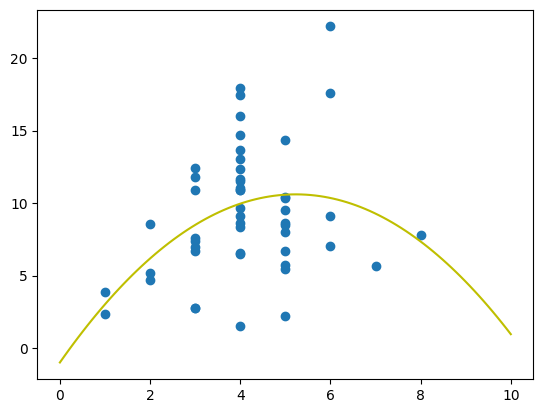

In [122]:
# График по регресии
plt.scatter(x[:, 1], y)
plt.plot(tmp_x[:, 1], tmp_x @ solve, 'y')

### #6 Построить несмещённую оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

In [123]:
mist = x @ solve - y
S2 = np.sum((mist) ** 2) / (x.shape[0] - np.linalg.matrix_rank(x))

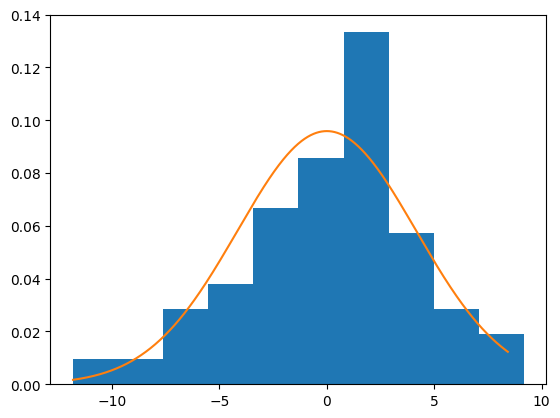

In [124]:
# Гистограмма ошибок
h = 2.1
bins = np.arange(min(mist), max(mist) + h, h)
plt.hist(mist, bins=bins, density=True)
hist, _ = np.histogram(mist, bins=bins)


tmp_x = np.linspace(min(mist), max(mist), 1000)
plt.plot(tmp_x, sst.norm(0, S2 ** 0.5).pdf(tmp_x))

In [125]:
f'несмещенная оценка дисперсии {S2}'

'несмещенная оценка дисперсии 17.30444796316552'

In [126]:
# Интервалы из гистограммы
intervals = [[bins[i] + 1e-5 * (i != 0), bins[i + 1]] for i in range(len(bins) - 1)]

In [127]:
g = lambda x: np.sum((mist >= x[0]) & (mist <= x[1]))

In [128]:
frq_exp = np.array([g(i) for i in intervals]) / len(mist)
assert frq_exp.sum() == 1

In [129]:
N = sst.norm(0, S2)

In [130]:
frq_norm = np.array([abs(N.pdf(i[1]) - N.pdf(i[0])) * len(mist) for i in intervals])

In [131]:
frq_norm

array([0.07161867, 0.06171529, 0.04933044, 0.03488525, 0.01894384,
       0.00217674, 0.01468582, 0.03090666, 0.04579514, 0.05875584])

In [132]:
chi_square = np.sum((frq_exp - frq_norm) ** 2 / frq_norm)
f"chi^2: {chi_square}"

'chi^2: 20.486844814857445'

In [133]:
alph = 0.1
f'x_alph: {sst.chi2.ppf(1 - alph, df=len(frq_norm) - 1)}'

'x_alph: 14.683656573259837'

$\chi^2 > x_{\alpha}$ следовательно гипотеза о нормальности отвергается

In [134]:
mist_tmp = mist.reshape(-1)
emp_func = pd.Series(mist_tmp).apply(lambda x: sum(mist_tmp < x)) / mist_tmp.shape[0]

In [135]:
emp_func.index = mist_tmp

In [136]:
Dn = np.max(np.abs(N.pdf(mist_tmp) - emp_func))
Dn

0.9595253650828102

In [137]:
C = sst.kstwobign.ppf(1 - alph) / np.sqrt(len(x))
C

0.17307822563424255

$D_n > С \implies$  гипотезy отвергаем

### #7 В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0, \beta_1, \beta_2$ уровня доверия $1 - \alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1 - \alpha$

In [138]:
# Считаем доверительные интервалы
r = np.linalg.matrix_rank(x)
n = x.shape[0]
x_alpha = sst.t.ppf(1 - alph/2, df = n - r)
C = np.matrix([[1], [0], [0]])
psi = (C.T @ np.linalg.inv(x.T @ x) @ C)
psi = psi[0, 0]
print(f"x_alpha = {x_alpha}" )
print(f"left = {solve[0][0] - x_alpha * (S2 * psi) ** 0.5}")
print(f"right = {solve[0][0] + x_alpha * (S2 * psi) ** 0.5}")

x_alpha = 1.67792672077558
left = -0.7527213523771801
right = -0.09428603789943102


$\left[-0.752, -0.094\right] \ni \beta_0$

In [139]:
# Считаем доверительные интервалы
r = np.linalg.matrix_rank(x)
n = x.shape[0]
x_alpha = sst.t.ppf(1 - alph/2, df = n - r)
C = np.matrix([[0], [1], [0]])
psi = (C.T @ np.linalg.inv(x.T @ x) @ C)
psi = psi[0, 0]
print(f"x_alpha = {x_alpha}" )
print(f"left = {solve[1][0] - x_alpha * (S2 * psi) ** 0.5}")
print(f"right = {solve[1][0] + x_alpha * (S2 * psi) ** 0.5}")

x_alpha = 1.67792672077558
left = 1.5629647410015788
right = 7.297133940233152


$\left[1.562, 7.297\right] \ni \beta_1$

In [140]:
# Считаем доверительные интервалы
r = np.linalg.matrix_rank(x)
n = x.shape[0]
x_alpha = sst.t.ppf(1 - alph/2, df = n - r)
C = np.matrix([[0], [0], [1]])
psi = (C.T @ np.linalg.inv(x.T @ x) @ C)
psi = psi[0, 0]
print(f"x_alpha = {x_alpha}" )
print(f"left = {solve[2][0] - x_alpha * (S2 * psi) ** 0.5}")
print(f"right = {solve[2][0] + x_alpha * (S2 * psi) ** 0.5}")

x_alpha = 1.67792672077558
left = -7.100678351750929
right = 5.132751365638878


$\left[-7.10, 5.132\right] \ni \beta_2$

In [141]:
# Аналогичено посчитаем оси эллипсоида
C = np.eye(3)
B = C.T @ np.linalg.inv(x.T @ x) @ C

In [142]:
B

array([[ 0.00222465, -0.01872888,  0.03536536],
       [-0.01872888,  0.16872416, -0.34303725],
       [ 0.03536536, -0.34303725,  0.76794964]])

In [143]:
B_inv = np.linalg.inv(B)

In [144]:
q = len(solve)
x_alpha = sst.f.ppf(1-alph, dfn=q, dfd=n - r)

In [145]:
cov = B_inv

In [146]:
eigenvalues, _ = np.linalg.eig(cov)

In [147]:
np.set_printoptions(suppress=True)

In [148]:
np.sqrt(1 / (eigenvalues / (x_alpha * q * S2)) )

array([ 0.06751378,  1.23527135, 10.29098591])

Первая полуось $\approx$ 0.07  
Вторая полуось $\approx$ 1.24  
Третья полуось $\approx$ 10.29

### #8 Сформулировать гипотезу линейной регрессионной зависимости переменной $Y$ от переменной $X$ и проверить её значимость на уровне $\alpha$.

Основная гипотеза: $H_0 : \beta_2 = 0$

In [149]:
# Занулим х**2
x = x[:, 1:]

In [150]:

solve = np.linalg.inv(np.dot(x.T, x)) @ x.T @ y
display(solve)
SSH = np.sum((x @ solve - y) ** 2) - S2 * (x.shape[0] - np.linalg.matrix_rank(x))

F_stat = (SSH / q) / (S2)
print(f"Статистика F = {F_stat}")
print(f"x_alpha = {sst.f.ppf(1 - alph, dfn=q, dfd=n - r)}")

array([[0.86466298],
       [5.74848177]])

Статистика F = 1.219671807769262
x_alpha = 2.2041823911022664


$\mathbb{F} > x_{\alpha} \implies$  гипотеза о зависимости принимается

## Выводы

Во время выполнения практической работы был изучен регрессионный анализ, который включал в себя построение модели, оценку параметров, исследование их значимости, проверку гипотезы о независимости и линейной регрессионной зависимости, оценку нормальности ошибок и построение доверительных интервалов, эллипсов и эллипсоидов. Была сформулирована гипотеза о независимости (и зависимости) переменной Y от переменной X.